<a href="https://colab.research.google.com/github/goranshj2000/Hierarchical_clustering/blob/main/perth_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/perth_correlation calc - Sheet1.csv')
df.head()

,Suburbs,SELECTED MEDIANS AND AVERAGES_Median age of persons,SELECTED MEDIANS AND AVERAGES_Median mortgage repayment ($/monthly),SELECTED MEDIANS AND AVERAGES_Median total personal income ($/weekly),SELECTED MEDIANS AND AVERAGES_Median rent ($/weekly)(a),SELECTED MEDIANS AND AVERAGES_Median total family income ($/weekly),SELECTED MEDIANS AND AVERAGES_Average number of persons per bedroom,SELECTED MEDIANS AND AVERAGES_Median total household income ($/weekly),SELECTED MEDIANS AND AVERAGES_Average household size,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Birthplace_Australia(b)_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Birthplace_Elsewhere(c)_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Highest year of school completed(f)_Did not go to school_Persons
0,Alexander Heights,39,1733,703,360,1917,0.8,1709,2.9,3837,3933,7772,4475,3089,185
1,Alfred Cove,41,2400,993,430,2922,0.7,2262,2.6,1342,1488,2830,1918,814,9
2,Alkimos,31,1950,977,360,2247,0.8,2035,2.8,4885,5320,10203,5107,4709,24
3,Anketell,44,1950,772,399,1937,0.8,1797,2.7,156,124,280,196,72,0
4,Applecross,44,2800,1167,475,3304,0.7,2453,2.5,3462,3766,7228,4159,2832,11


In [ ]:
df = df.rename(columns={'Suburbs': 'check_suburbs'})
df.columns = df.columns.str.split('_',n=1).str[1]
df.columns

Index(['suburbs', 'Median age of persons',
       'Median mortgage repayment ($/monthly)',
       'Median total personal income ($/weekly)', 'Median rent ($/weekly)(a)',
       'Median total family income ($/weekly)',
       'Average number of persons per bedroom',
       'Median total household income ($/weekly)', 'Average household size',
       'Total persons_Males', 'Total persons_Females', 'Total persons_Persons',
       'Birthplace_Australia(b)_Persons', 'Birthplace_Elsewhere(c)_Persons',
       'Highest year of school completed(f)_Did not go to school_Persons'],
      dtype='object')

In [ ]:
df.head()

,suburbs,Median age of persons,Median mortgage repayment ($/monthly),Median total personal income ($/weekly),Median rent ($/weekly)(a),Median total family income ($/weekly),Average number of persons per bedroom,Median total household income ($/weekly),Average household size,Total persons_Males,Total persons_Females,Total persons_Persons,Birthplace_Australia(b)_Persons,Birthplace_Elsewhere(c)_Persons,Highest year of school completed(f)_Did not go to school_Persons
0,Alexander Heights,39,1733,703,360,1917,0.8,1709,2.9,3837,3933,7772,4475,3089,185
1,Alfred Cove,41,2400,993,430,2922,0.7,2262,2.6,1342,1488,2830,1918,814,9
2,Alkimos,31,1950,977,360,2247,0.8,2035,2.8,4885,5320,10203,5107,4709,24
3,Anketell,44,1950,772,399,1937,0.8,1797,2.7,156,124,280,196,72,0
4,Applecross,44,2800,1167,475,3304,0.7,2453,2.5,3462,3766,7228,4159,2832,11


In [ ]:
df_max_scaled = df.copy()

# apply normalization techniques
for column in df_max_scaled.columns[1:]:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)

,suburbs,Median age of persons,Median mortgage repayment ($/monthly),Median total personal income ($/weekly),Median rent ($/weekly)(a),Median total family income ($/weekly),Average number of persons per bedroom,Median total household income ($/weekly),Average household size,Total persons_Males,Total persons_Females,Total persons_Persons,Birthplace_Australia(b)_Persons,Birthplace_Elsewhere(c)_Persons,Highest year of school completed(f)_Did not go to school_Persons
0,Alexander Heights,0.609375,0.3466,0.432615,0.448878,0.273857,0.421053,0.365796,0.644444,0.208691,0.203614,0.206170,0.187631,0.178205,0.502717
1,Alfred Cove,0.640625,0.4800,0.611077,0.536160,0.417429,0.368421,0.484161,0.577778,0.072990,0.077035,0.075072,0.080419,0.046960,0.024457
2,Alkimos,0.484375,0.3900,0.601231,0.448878,0.321000,0.421053,0.435574,0.622222,0.265691,0.275419,0.270658,0.214130,0.271663,0.065217
3,Anketell,0.687500,0.3900,0.475077,0.497506,0.276714,0.421053,0.384632,0.600000,0.008485,0.006420,0.007428,0.008218,0.004154,0.000000
4,Applecross,0.687500,0.5600,0.718154,0.592269,0.472000,0.368421,0.525043,0.555556,0.188295,0.194968,0.191739,0.174382,0.163378,0.029891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Wooroloo,0.578125,0.3372,0.460923,0.448878,0.306714,0.421053,0.405608,0.577778,0.121016,0.020242,0.069316,0.083941,0.031441,0.271739
341,Wungong,0.593750,0.5200,0.394462,0.548628,0.272857,0.421053,0.401327,0.733333,0.010171,0.009681,0.009815,0.010985,0.005134,0.008152
342,Yanchep,0.546875,0.3684,0.468923,0.423940,0.284286,0.368421,0.363656,0.622222,0.294028,0.291209,0.292384,0.263354,0.239587,0.067935
343,Yangebup,0.578125,0.3466,0.540923,0.436409,0.319000,0.368421,0.409889,0.577778,0.205646,0.199368,0.202430,0.216394,0.124495,0.141304


In [ ]:
matrix = df.corr(method = 'kendall')
#matrix.to_csv('correlation_13attributes.csv')

pearson: standard correlation coefficient

kendall: Kendall Tau correlation coefficient

spearman: Spearman rank correlation

df.corr(method ='pearson')

In [ ]:
matrix

,Median age of persons,Median mortgage repayment ($/monthly),Median total personal income ($/weekly),Median rent ($/weekly)(a),Median total family income ($/weekly),Average number of persons per bedroom,Median total household income ($/weekly),Average household size,Total persons_Males,Total persons_Females,Total persons_Persons,Birthplace_Australia(b)_Persons,Birthplace_Elsewhere(c)_Persons,Highest year of school completed(f)_Did not go to school_Persons
Median age of persons,1.000000,0.254663,-0.109916,0.065679,0.137641,-0.269157,0.056608,-0.087270,-0.301541,-0.288221,-0.294780,-0.253720,-0.332052,-0.351264
Median mortgage repayment ($/monthly),0.254663,1.000000,0.372639,0.469232,0.616413,0.026520,0.570276,0.191743,-0.053625,-0.041399,-0.046376,-0.015380,-0.065995,-0.216867
Median total personal income ($/weekly),-0.109916,0.372639,1.000000,0.388710,0.605723,0.113016,0.514112,0.024266,0.106176,0.114609,0.111095,0.126386,0.094987,-0.088726
Median rent ($/weekly)(a),0.065679,0.469232,0.388710,1.000000,0.480269,-0.053386,0.580183,0.284681,0.133312,0.138736,0.137111,0.145078,0.139045,-0.046976
Median total family income ($/weekly),0.137641,0.616413,0.605723,0.480269,1.000000,0.068579,0.672389,0.111903,0.030533,0.042740,0.038118,0.068032,0.014113,-0.169044
Average number of persons per bedroom,-0.269157,0.026520,0.113016,-0.053386,0.068579,1.000000,0.010594,0.010114,0.012846,0.002735,0.007987,-0.032980,0.051476,0.081229
Median total household income ($/weekly),0.056608,0.570276,0.514112,0.580183,0.672389,0.010594,1.000000,0.399159,0.038759,0.043682,0.043141,0.065130,0.030199,-0.159414
Average household size,-0.087270,0.191743,0.024266,0.284681,0.111903,0.010114,0.399159,1.000000,0.021506,0.017919,0.019272,0.021138,0.033362,-0.049102
Total persons_Males,-0.301541,-0.053625,0.106176,0.133312,0.030533,0.012846,0.038759,0.021506,1.000000,0.957187,0.978038,0.893234,0.865511,0.619879
Total persons_Females,-0.288221,-0.041399,0.114609,0.138736,0.042740,0.002735,0.043682,0.017919,0.957187,1.000000,0.979185,0.900735,0.862831,0.605462


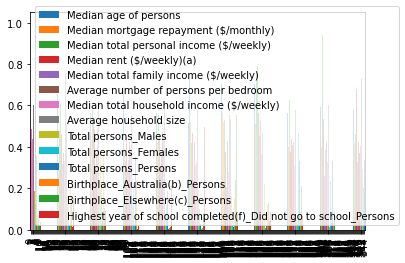

In [ ]:
import matplotlib.pyplot as plt
df_max_scaled.plot(kind = 'bar')

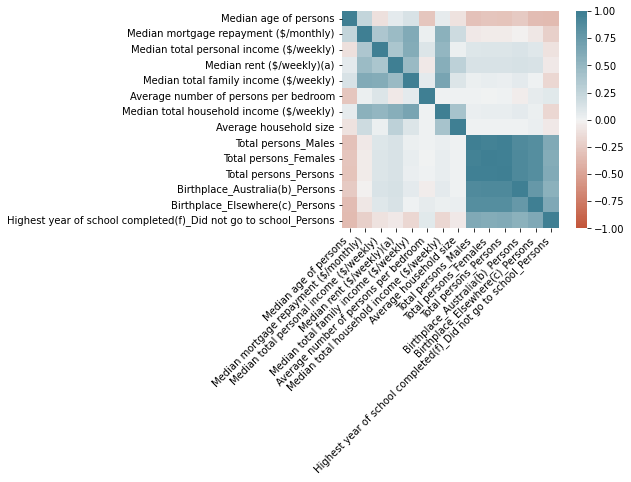

In [ ]:
import seaborn as sns

ax = sns.heatmap(
    matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
!pip install heatmapz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


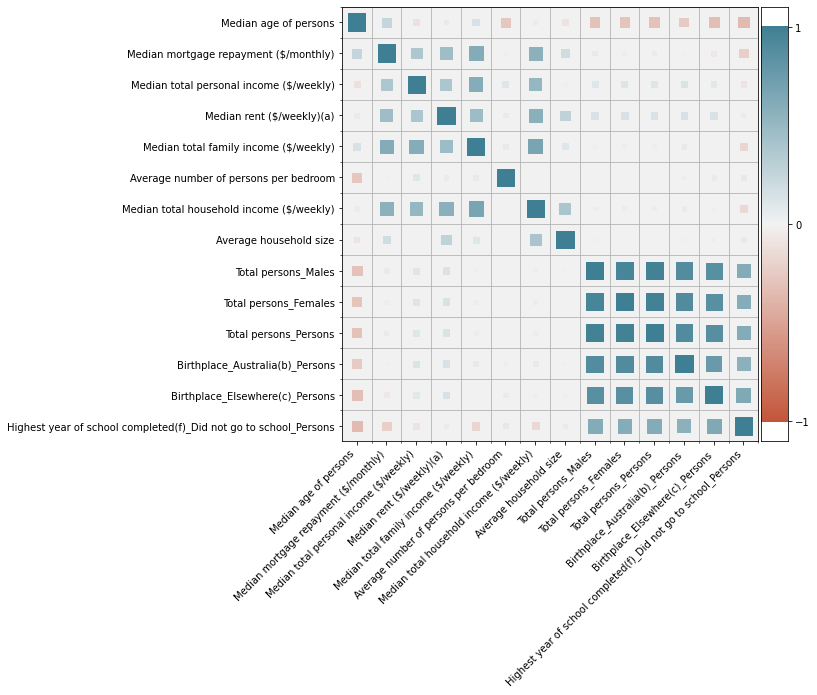

In [ ]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(8, 8))
corrplot(matrix, size_scale=300);